### 실습 | 영화 리뷰가 긍정적인지 부정적인지 예측

{'너무': 1, '재밌네요': 2, '최고에요': 3, '참': 4, '잘': 5, '만든': 6, '영화네요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로에요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과 :
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


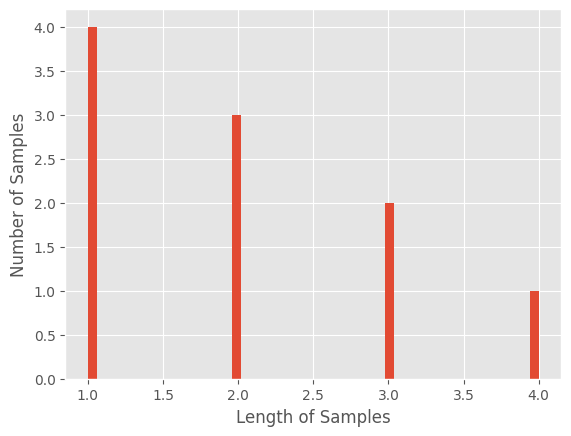

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

docs = ["너무 재밌네요", "최고에요", "참 잘 만든 영화네요", "추천하고 싶은 영화입니다", "한번 더 보고싶네요", "글쎄요", "별로에요", "생각보다 지루하네요",
        "연기가 어색해요", "재미없어요"]

classes = np.array([1,1,1,1,1,0,0,0,0,0])  # 긍정1, 부정0

token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

X = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과 :\n", X)

plt.hist([ len(x) for x in X ], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show();


In [7]:
max_len = 4
padded_x = pad_sequences(X, maxlen=max_len, padding='pre')
print("\n패딩 결과 :\n{}".format(padded_x))

word_size = len(token.word_index) + 1  # 임베딩에 입력될 단어의 수 지정
print(word_size)


패딩 결과 :
[[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]
21


In [8]:
model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=8, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']
)

model.fit(padded_x, classes, epochs=20)
print("\nAccuracy : %.4f\n" % (model.evaluate(padded_x, classes)[1]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 8)              168       
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 201 (804.00 Byte)


Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - 1s 681ms/step - loss: 0.6966 - acc: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6950 - acc: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 9ms/step - loss: 0.6934 - acc: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 0.6918 - acc: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6901 - acc: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6885 - acc: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 0.6869 - acc: 0.8000
Epoch 8/20
1/1 [==============================] - 0s 10ms/step - loss: 0.6853 - acc: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 8ms/step - loss: 0.6837 - acc: 0.9000
Epoch 10/20
1/1 [====================